<a href="https://colab.research.google.com/github/aishwaryage/p4p/blob/main/Day7/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

In [2]:
def rotate_vec(vec0):
  """
  this piece of code rotates an array (vec0)
  by one to the left
  """
  N=len(vec0)
  tmp = np.zeros(N)

  # place elements from 1 onward in new list
  tmp[0:N-1]= vec0[1:N]

  # place element 0 at the end of new list
  tmp[N-1]= vec0[0]

  return tmp


def Energy_Ising(St,a,b,c):
  "rotate the spins by one"
  Stp1 = rotate_vec(St)
  "rotate the spins by two"
  Stp2 = rotate_vec(Stp1)

  # calculate each term with St/Stp1/Stp2
  "nearest neighbors"
  dEa = sum(St * Stp1) * a
  "next-to-nearest neighbors"
  dEb = sum(St * Stp2) * b
  "background field"
  dEc = sum(St) * c

  return dEa + dEb + dEc

In [38]:
def ising_lists(N):
  """
  if we have N possible spins,
  there are 2^N possible states

  we will put these into lists,
  starting with a single spin that is
  either up or down
  """
  # this is the list if N=1
  TOT=[[1],[-1]]

  # we need to add N-1 spins to our list
  for n in range(N-1):

    # this is the current lenght of our list
    Nt = len(TOT)
    #print(Nt)

    # loop over spin states in the list
    # we will append the next spin, both +1 and -1
    for j0 in range(Nt):


      # make two copies
      state1 = TOT[j0][:]
      state2 = TOT[j0][:]
      #print(state1)
      #print(state2)
      "we add 1 to the first one"
      state1.append(1)
      "we add -1 to the second one"
      state2.append(-1)
      #print(state1)
      #print(state2)

      "here we replace the previous value of TOT[j0] with state1"
      TOT[j0]=state1
      #print(TOT[j0])
      "here we add state2 to the end of TOT"
      TOT.append(state2)
      #print(TOT)


  return TOT

In [39]:
ising_lists(2)

[[1, 1], [-1, 1], [1, -1], [-1, -1]]

In [40]:
"""
here we test that we are recovering the expected
number of states for N=2,3,4
"""
print("")
print("###########################")
N=2
states = ising_lists(N)
print("N = ", N)
print("number of states = ", len(states))
print("expected number of states = ", pow(2,N))
for state0 in states:
  print(state0)

print("")
print("###########################")
N=3
states = ising_lists(N)
print("N = ", N)
print("number of states = ", len(states))
print("expected number of states = ", pow(2,N))
for state0 in states:
  print(state0)

print("")
print("###########################")
N=4
states = ising_lists(N)
print("N = ", N)
print("number of states = ", len(states))
print("expected number of states = ", pow(2,N))
for state0 in states:
  print(state0)


###########################
N =  2
number of states =  4
expected number of states =  4
[1, 1]
[-1, 1]
[1, -1]
[-1, -1]

###########################
N =  3
number of states =  8
expected number of states =  8
[1, 1, 1]
[-1, 1, 1]
[1, -1, 1]
[-1, -1, 1]
[1, 1, -1]
[-1, 1, -1]
[1, -1, -1]
[-1, -1, -1]

###########################
N =  4
number of states =  16
expected number of states =  16
[1, 1, 1, 1]
[-1, 1, 1, 1]
[1, -1, 1, 1]
[-1, -1, 1, 1]
[1, 1, -1, 1]
[-1, 1, -1, 1]
[1, -1, -1, 1]
[-1, -1, -1, 1]
[1, 1, 1, -1]
[-1, 1, 1, -1]
[1, -1, 1, -1]
[-1, -1, 1, -1]
[1, 1, -1, -1]
[-1, 1, -1, -1]
[1, -1, -1, -1]
[-1, -1, -1, -1]


In [46]:
"""
this code evaluates the energies of all the possible
spin states, and then sorts them from smallest value to biggest.
"""
def ising_sort(N):

  # generate all states
  TOT = ising_lists(N)

  if print_opt=='y':
    print("############################################")
    print("a,b,c")
    print(a,b,c)
    print("total number of elements = ",len(TOT))
    print("expected number is = ", pow(2,N))

  Es = []
  # loop over states and calculate the energy
  for tot in TOT:
    # needs to be array to use element-wise multiplication
    St = np.array(tot)

    # calculate the energy of the state (Hint use function Energy_Ising)
    Et = Energy_Ising(St,a,b,c)

    # add the energy to the list
    Es.append(Et)

  # numpy provides a function to order the energies
  Es_sorted = np.sort(Es)

  # the first element is the ground state (lowest energy)
  E0 = Es_sorted[0]
  if print_opt=='y':
    print("ground state energy = ",E0)

    # to look for degeneracies we need to loop over states again
    Ndeg=0
    for tot in TOT:
      St = np.array(tot)
      # calculate the energy of the state (Hint use function Energy_Ising)
      Et = Energy_Ising(St, a, b, c)
      if Et == E0:
        print(tot)
        Ndeg+=1

    print("degeneracy for the ground state = ", Ndeg)
    print("############################################")
    print("")

  return Es_sorted

In [48]:
"""
here we use the code above to consider different possible scenarios
"""
examples3to6 = 'y'
if examples3to6 =='y':
  det_opt='gs'
  print_opt = 'y'

  a,b,c = 5,1,.01
  ising_sort(3)

  a,b,c = -5,1,.0
  ising_sort(10)


  a,b,c = -5,1,.01
  ising_sort(10)

  a,b,c = -5,1,-.01
  ising_sort(10)

  a,b,c = 15,-.2,.02
  ising_sort(15)

############################################
a,b,c
5 1 0.01
total number of elements =  8
expected number is =  8
ground state energy =  -6.01
[-1, -1, 1]
[-1, 1, -1]
[1, -1, -1]
degeneracy for the ground state =  3
############################################

############################################
a,b,c
-5 1 0.0
total number of elements =  1024
expected number is =  1024
ground state energy =  -40.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
degeneracy for the ground state =  2
############################################

############################################
a,b,c
-5 1 0.01
total number of elements =  1024
expected number is =  1024
ground state energy =  -40.1
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
degeneracy for the ground state =  1
############################################

############################################
a,b,c
-5 1 -0.01
total number of elements =  1024
expected number is =  1024
ground state energy =  -40.1
[1, 1, 1,

guess for gs = [1, -1, 1, -1, 1, -1, 1, -1, 1, -1]


Text(0, 0.5, 'Energy')

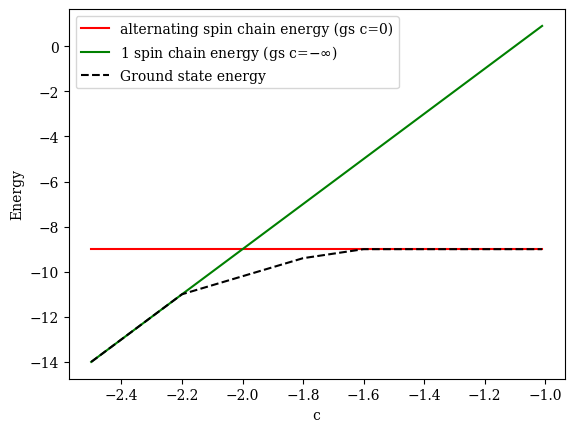

In [49]:
print_opt = 'n'
a,b,c = 1,.1,0

cs= np.arange(-2.5,-1,.01)
E0s=[]
N=10

"the assumed ground state for c=0"
St0=[]
for j0 in range(N):
  St0.append(pow(-1,j0))


"the assumed ground state for c=infty"
Stinfty=[]
for j0 in range(N):
  Stinfty.append(1)

print("guess for gs =", St0)
Egs_vec=[]
E0_vec=[]
Einfty_vec=[]
for c in cs:
  # ground state energy of the system
  Egs = ising_sort(N)[0]
  Egs_vec.append(Egs)

  # energy for St0
  E0 = Energy_Ising(St0,a,b,c)
  E0_vec.append(E0)

  # energy for Stinfty
  Einfty = Energy_Ising(Stinfty,a,b,c)
  Einfty_vec.append(Einfty)


plt.plot(cs,np.array(E0_vec),color='r', label='alternating spin chain energy (gs c=0)')
plt.plot(cs,np.array(Einfty_vec),color='g', label='1 spin chain energy (gs c=$-\infty$)')

plt.plot(cs,np.array(Egs_vec),color='k', ls='--', label='Ground state energy')

plt.legend()

plt.xlabel('c')
plt.ylabel('Energy')